In [53]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
data = pd.read_csv(r'/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')
#########Data Wranglanging
#checking for missing values
print(data.isna().any())
#check if there a duplicated customer id
print(data.duplicated('CustomerId').sum())
#drop nin necassricy colmns

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool
0


In [69]:
data.head()
print(data.nunique())
print(data.describe())
print(data.info())


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.

In [70]:
dataset = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [71]:
df1=data.copy()
df1.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#  Visualiztion 

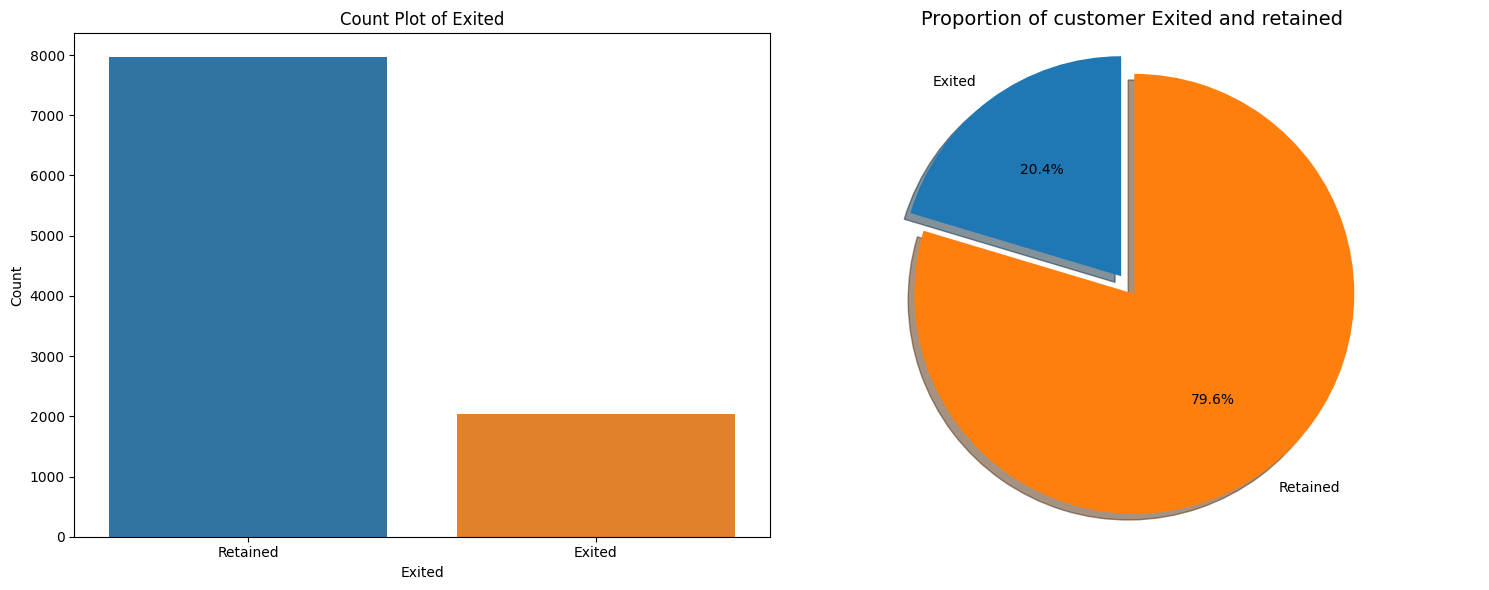

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

#1)basic visualization to understand how the data is distributed(histogram,piechart)
count = dataset["Exited"].value_counts()

plt.figure(figsize=(15, 6))

#Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Exited', data=dataset)
plt.title("Count Plot of Exited")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.xticks([0, 1], ['Retained', 'Exited'])

# Pie chart
plt.subplot(1, 2, 2)
labels = 'Exited', 'Retained'
sizes = [count[1], count[0]]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.title("Proportion of customer Exited and retained", size=14)

plt.tight_layout()
plt.show()

# From the visualization above, the number of customers that exited the bank is lower compared to the number of
# customers that didn’t leave the bank.

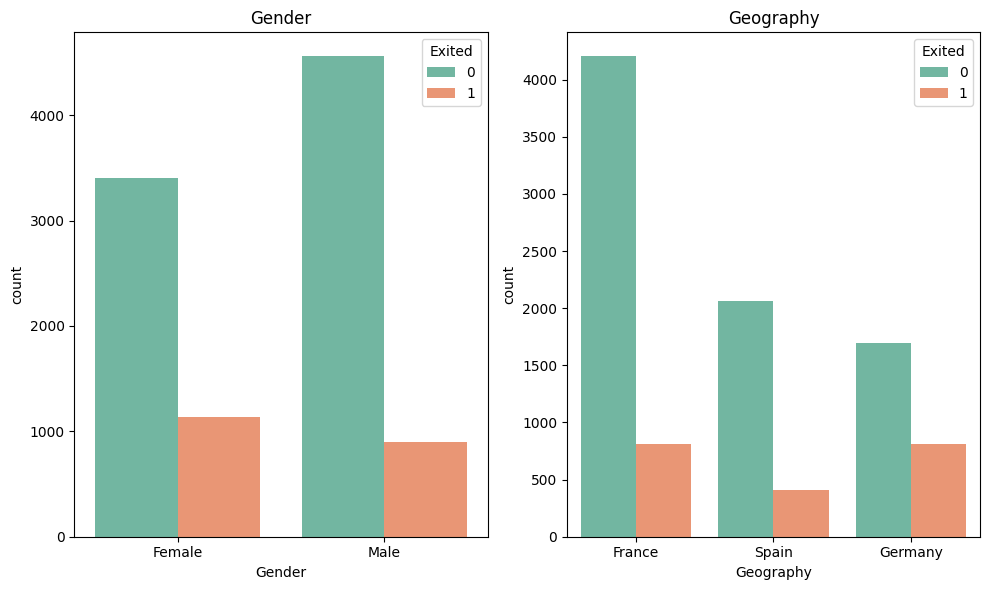

In [73]:
#2)visualize the relationship between the target variable (exited) and gender attribute
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=dataset, hue='Exited', palette='Set2')
plt.title('Gender')

plt.subplot(1, 2, 2)
sns.countplot(x='Geography', data=dataset, hue='Exited', palette='Set2')
plt.title('Geography')

plt.tight_layout()
plt.show()

# Gender->From the visualization above, Female customers left the bank more often compared to the Male customers
# Geography->From the visualization above, the average loss of customers is highest in Germany followed by France and
# the least in Spain

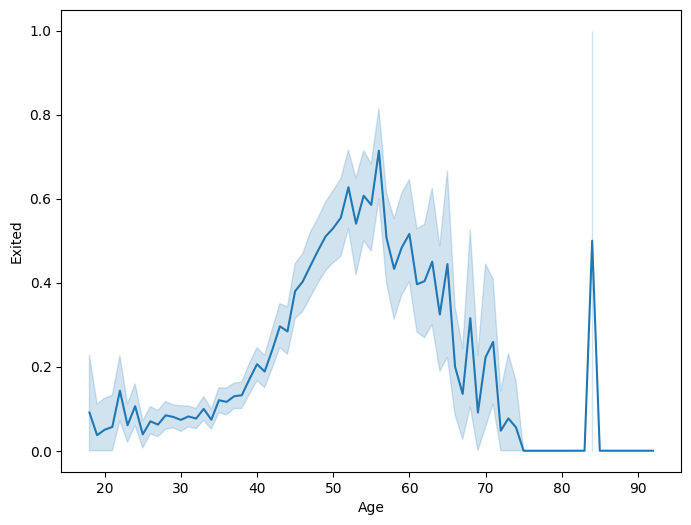

In [74]:
#3)The relationship between ‘Age’ and the target variable (Exited).
plt.figure(figsize = (8,6))
sns.lineplot(x = "Age", y = "Exited", data = dataset)
plt.show()
# From the visualization above, exited customers are older, on average, than those still active. This kind of makes sense, as
# clients who have left must have been with the bank some time. The young ones have not really had the reason or the opportunity
# to yet leave(Most of the customers who leave the bank are between 40 and 60 years)

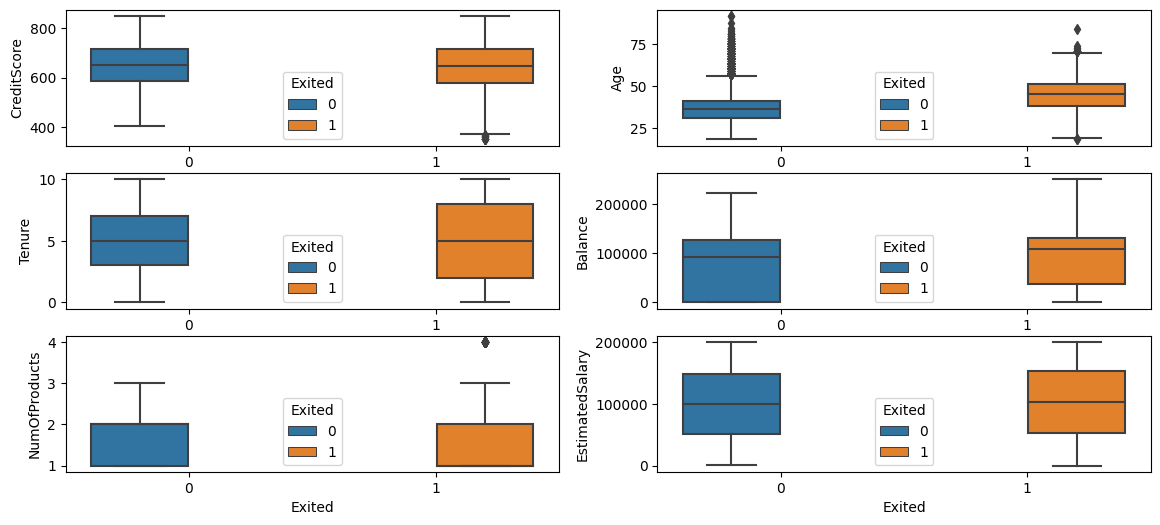

In [75]:
#Multiple box plots
fig, axarr = plt.subplots(3, 2, figsize=(14, 6))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])
plt.show()


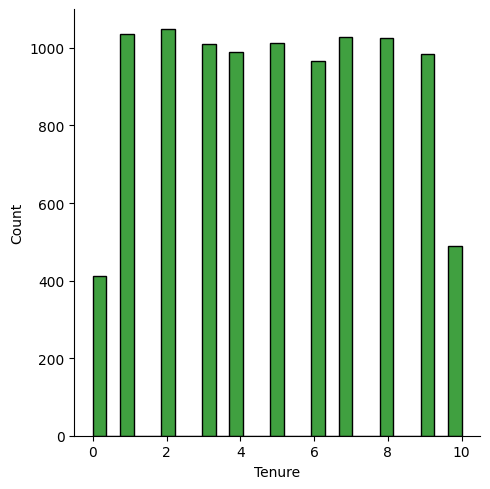

In [76]:


#Tenure=>Number of years for which the customer has been with the bank
sns.displot(data = data, x ='Tenure', kind = 'hist', color = 'g')
plt.show()
#we see that customers has been with the bank about 1 to 8 on averge



In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender_encoded'] = le.fit_transform(df1['Gender'])
df1.drop('Gender',axis=1, inplace=True)


from sklearn.model_selection import train_test_split, GridSearchCV
x = df1.drop(["RowNumber", "CustomerId", "Surname", "Exited", "Geography"], axis=1)
y = df1["Exited"]

# normalize X
scaler = StandardScaler()
x = scaler.fit_transform(x)
#Split the data 

x, X_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x.shape, X_test.shape, y.shape, y_test.shape

((8000, 9), (2000, 9), (8000,), (2000,))

In [78]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score,make_scorer

print("Linear Regression:")
model1 = SGDRegressor(loss='squared_error', max_iter=1000)

# Train the model
model1.fit(x, y)

# Make predictions on the training and testing sets
y_train_pred = model1.predict(x)
y_test_pred = model1.predict(X_test)

#Note that we added .round() to the predicted values to convert them into binary predictions before calculating the accuracy score.
print("Training MAE:", mean_absolute_error(y, y_train_pred))
print("Testing MAE:", mean_absolute_error(y_test, y_test_pred))
print("Training accuracy:", accuracy_score(y, y_train_pred.round())*100,"%")
print("Testing accuracy:", accuracy_score(y_test, y_test_pred.round())*100,"%","\n")

Linear Regression:
Training MAE: 0.2900220838200756
Testing MAE: 0.28976668706698594
Training accuracy: 80.075 %
Testing accuracy: 80.0 % 



In [79]:
from sklearn.linear_model import SGDRegressor
# Define the hyperparameters to tune
model = SGDRegressor()

# Define the hyperparameters to tune and their possible values
param_grid = {
    'loss': ['squared_error', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000 , 2000]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2',n_jobs=-1)
grid_search.fit(x, y)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'alpha': 0.001, 'learning_rate': 'invscaling', 'loss': 'squared_error', 'max_iter': 500}


In [80]:
from sklearn.metrics import mean_absolute_error, accuracy_score,make_scorer
#apply best parameter to model
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(x)
y_pred = best_model.predict(X_test)
y_pred_rounded = y_pred.round()
accuracy = accuracy_score(y_test, y_pred_rounded)
print("Accuracy score: ", accuracy*100,"%")

Accuracy score:  80.4 %


In [89]:
def fit_model(x, y, epochs, alpha):
    alpha = alpha
    num_iters = epochs

    # Initialize the coefficients
    theta = np.zeros(x.shape[1])
    theta0 = 0

    # Define the cost function Mean Squared Error (MSE)
    def cost_function(x, y, theta, theta0):
        m = len(y)
        h = x.dot(theta) + theta0
        J = (1 / (2 * m)) * np.sum(np.square(h - y))
        return J

    # Define the gradient descent function
    def gradient_descent(x, y, theta, theta0, alpha, num_iters):
        m = len(y)
        J_history = []
        for i in range(num_iters):
            h = x.dot(theta) + theta0
            theta = theta - (alpha / m) * np.sum(x.T.dot(h - y))
            theta0 = theta0 - (alpha / m) * np.sum((h - y))
            J_history.append(cost_function(x, y, theta,theta0))
            print(cost_function(x, y, theta,theta0))
        return theta, theta0, J_history

    # Apply Gradient Descent
    theta, theta0, J_history = gradient_descent(x, y, theta, theta0, alpha, num_iters)

    # Predict values
    y_pred = x.dot(theta) + theta0

    # Calculate the mean squared error
    mse = mean_squared_error(y, y_pred)
    print("BONUS..........")
    print("Mean squared error:", mse)
    # Calculate the accuracy score
    accuracy = (1 - mse) * 100
    print("Accuracy score:", accuracy, "%")



In [90]:
#Training data
fit_model(x,y,1000,0.01)

0.10158484191812052
0.10117808568200388
0.10077954132864335
0.10038902636641729
0.1000063650280777
0.09963138763559132
0.09926393005888635
0.09890383325346361
0.09855094286426419
0.09820510888522768
0.09786618536568262
0.0975340301561444
0.09720850468729575
0.0968894737769304
0.09657680546048406
0.09627037084148234
0.09597004395882767
0.09567570166834298
0.09538722353640537
0.09510449174385181
0.09482739099863031
0.09455580845591499
0.09428963364460842
0.09402875839932626
0.09377307679710384
0.09352248509818453
0.093276881690351
0.09303616703634605
0.09280024362399979
0.0925690159187406
0.0923423903182166
0.09212027510879699
0.09190258042375742
0.09168921820298284
0.09148010215404737
0.09127514771454955
0.09107427201560099
0.0908773938463791
0.09068443361966894
0.09049531333832755
0.09030995656261491
0.09012828837834139
0.08995023536578858
0.08977572556936582
0.08960468846796826
0.08943705494600715
0.08927275726508521
0.08911172903629347
0.08895390519310764
0.08879922196486427
0.088647

In [91]:
#testin data
fit_model(X_test,y_test,1000,0.01)

0.10079124563308262
0.10034949520998655
0.0999230866272701
0.09951061327876812
0.09911088160027703
0.09872287573807023
0.09834572814450374
0.0979786951050404
0.09762113636830906
0.09727249818999252
0.09693229921713498
0.09660011873579756
0.0962755868851446
0.09595837650772802
0.09564819636121977
0.09534478546300101
0.09504790837742183
0.09475735128749557
0.09447291871937694
0.09419443081008828
0.09392172102736013
0.09365463426576144
0.09339302525603176
0.09313675723512473
0.09288570083328952
0.09263973314185131
0.09239873693145538
0.09216259999561717
0.09193121459864478
0.09170447701051529
0.0914822871142105
0.09126454807345112
0.0910511660507921
0.09084204996772614
0.09063711129984413
0.09043626390126654
0.09023942385353009
0.09004650933492124
0.08985744050691917
0.08967213941497011
0.08949052990127948
0.08931253752769513
0.08913808950707701
0.08896711464181635
0.08879954326839004
0.08863530720702194
0.08847433971567653
0.08831657544773908
0.08816195041284346
0.08801040194039746
0.087